In [1]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Define the paths to the train and test datasets
train_path = '/home/selab/darshan/git-repos/dataset/town7_dataset/train'
test_path = '/home/selab/darshan/git-repos/dataset/town7_dataset/test'

# count the number of files in the train and test datasets
train_files = os.listdir(train_path)
test_files = os.listdir(test_path)

print('Number of files in the train dataset: ', len(train_files))
print('Number of files in the test dataset: ', len(test_files))


Number of files in the train dataset:  9690
Number of files in the test dataset:  2425


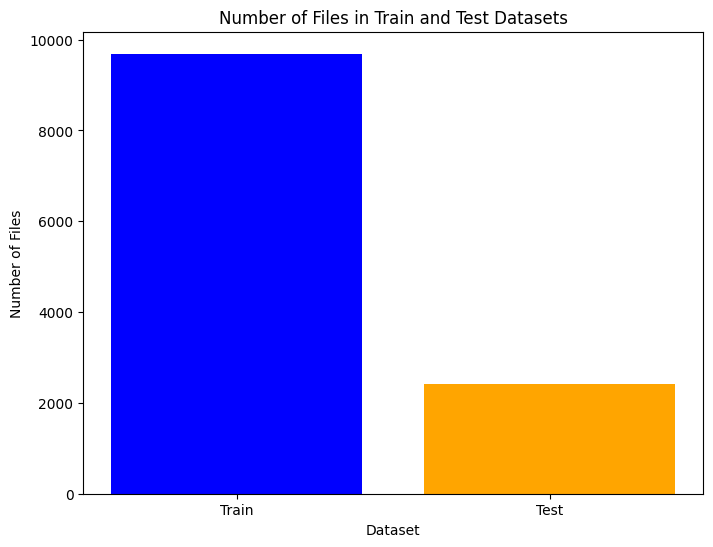

In [3]:
# Number of files in train and test datasets
num_train_files = len(train_files)
num_test_files = len(test_files)

# Plotting the data
labels = ['Train', 'Test']
values = [num_train_files, num_test_files]

plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['blue', 'orange'])
plt.xlabel('Dataset')
plt.ylabel('Number of Files')
plt.title('Number of Files in Train and Test Datasets')
plt.show()

label
GO       5360
STOP     5360
LEFT     5360
RIGHT    5360
Name: count, dtype: int64


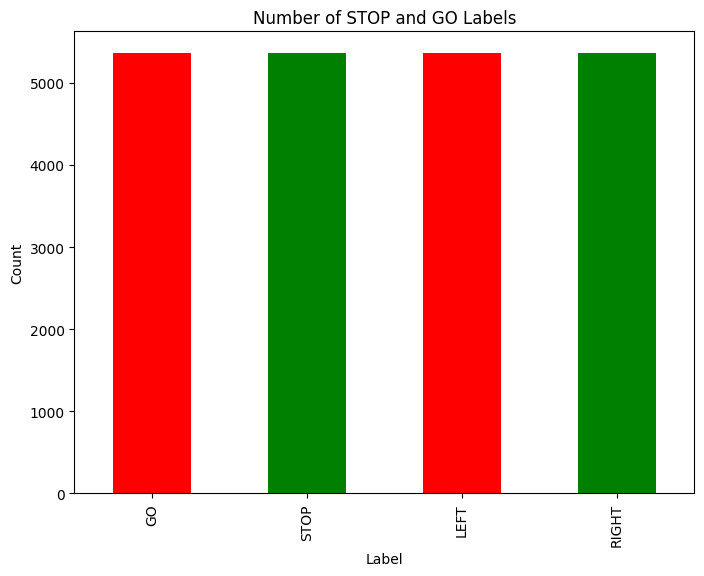

In [5]:
import pandas as pd

# Read the CSV file
csv_path = os.path.join(train_path, 'labeled_4_classes_data_log.csv')

# Check if the file exists
if not os.path.isfile(csv_path):
    raise FileNotFoundError(f"No such file or directory: '{csv_path}'")

df = pd.read_csv(csv_path)

# Count the number of STOP and GO labels
label_counts = df['label'].value_counts()

# print number of STOP and GO labels
print(label_counts)

# Plotting the data
plt.figure(figsize=(8, 6))
label_counts.plot(kind='bar', color=['red', 'green'])
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Number of STOP and GO Labels')
plt.show()